<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/EnsembleLearning_Bagging_MetaEstimator_and_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ensemble Learning

for a diverse set of models in comparison to single models. 
This diversification in Machine Learning is achieved by a technique called Ensemble Learning.

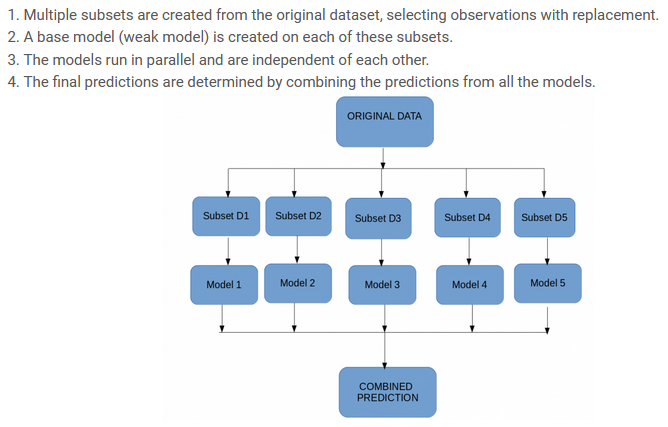

Ensemble Learning with bagging :
  1. Bagging Meta Estimator
  2. Random Forest

In [33]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
from sklearn.ensemble import RandomForestClassifier

##Bagging Meta-Estimator

Bagging meta-estimator is an ensembling algorithm that can be used for both classification (BaggingClassifier) and regression (BaggingRegressor) problems.

    1. Random subsets are created from the original dataset (Bootstrapping).
    2. The subset of the dataset includes all features.
    3. A user-specified base estimator is fitted on each of these smaller sets.
    4. Predictions from each model are combined to get the final result.

Parameters used in algorithm :


    base_estimator:
        It defines the base estimator to fit on random subsets of the dataset.
        When nothing is specified, the base estimator is a decision tree.
    n_estimators:
        It is the number of base estimators to be created.
        The number of estimators should be carefully tuned as a large number 
        would take a very long time to run, while a very small number might not provide the best results.
    max_samples:
        This parameter controls the size of the subsets.
        It is the maximum number of samples to train each base estimator.
    max_features:
        Controls the number of features to draw from the whole dataset.
        It defines the maximum number of features required to train each base estimator.
    n_jobs:
        The number of jobs to run in parallel.
        Set this value equal to the cores in your system.
        If -1, the number of jobs is set to the number of cores.

    random_state:
        It specifies the method of random split. When random state value is 
        same for two models, the random selection is same for both models.
        This parameter is useful when you want to compare different models.



###bagging Classifier

In [19]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
#making the bagging classifier with 100 decision trees
model=BaggingClassifier(n_estimators=100)
#fitting data to bagging model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)

Accuracy is : 0.8181818181818182
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       107
           1       0.69      0.74      0.71        47

    accuracy                           0.82       154
   macro avg       0.78      0.80      0.79       154
weighted avg       0.82      0.82      0.82       154



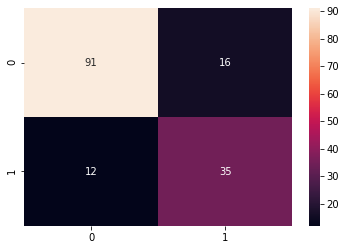

In [23]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

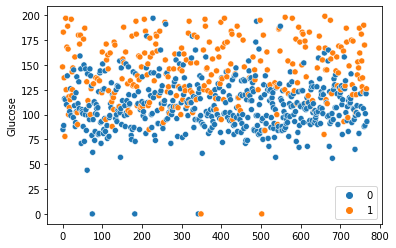

In [27]:
sns.scatterplot(data=df, x=df.index, y=df['Glucose'],hue=model.predict(x))

In [ ]:
#making the bagging classifier with 100 Logistic Regression models
model=BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100)
#fitting data to bagging model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)


Accuracy is : 0.8181818181818182
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



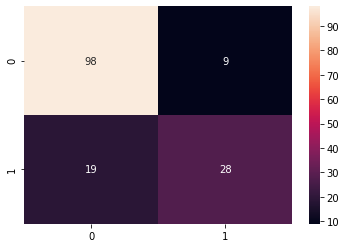

In [13]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

###Bagging Regressor

In [14]:
df = pd.read_csv('/content/housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [15]:
x = df.drop(columns='MEDV')
y = df['MEDV']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
#making the bagging classifier with 100 decision tree regressors
model = BaggingRegressor(DecisionTreeRegressor(random_state=1))
#fitting data to bagging model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
model.score(xtest,ytest)
print("Accuracy for model : ",r2_score(ytest,ypred))

Accuracy for model :  0.8361841499920172


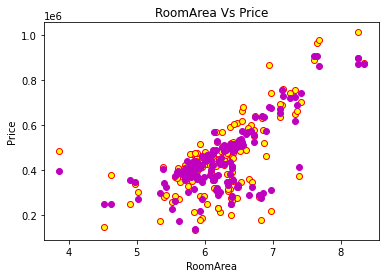

In [18]:
plt.scatter(xtest['RM'],ytest,color='yellow', edgecolors='red')
plt.scatter(xtest['RM'],model.predict(xtest),color='m')
plt.title("RoomArea Vs Price")
plt.xlabel("RoomArea")
plt.ylabel("Price")
plt.show()

##Random Forest Clasifier

 It is an extension of the bagging estimator algorithm and can be used for both classification (RandomForestClassifier) and regression (RandomForestRegressor) problems. 

The base estimators in random forest are decision trees. Unlike bagging meta estimator, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.


    1. Random subsets are created from the original dataset (bootstrapping).
    2. At each node in the decision tree, only a random set of features are considered to decide the best split.
    3. A decision tree model is fitted on each of the subsets.
    4. The final prediction is calculated by averaging the predictions from all decision trees.

Parameters used in random forest classifier:


    n_estimators:
        It defines the number of decision trees to be created in a random forest.
        Generally, a higher number makes the predictions stronger and more stable, 
        but a very large number can result in higher training time.
    criterion:
        It defines the function that is to be used for splitting.
        The function measures the quality of a split for each feature and chooses the best split.
    max_features :
        It defines the maximum number of features allowed for the split in each decision tree.
        Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.
    max_depth:
        Random forest has multiple decision trees. This parameter defines the maximum depth of the trees.
    min_samples_split:
        Used to define the minimum number of samples required in a leaf node before a split is attempted.
        If the number of samples is less than the required number, the node is not split.
    min_samples_leaf:
        This defines the minimum number of samples required to be at a leaf node.
        Smaller leaf size makes the model more prone to capturing noise in train data.
    max_leaf_nodes:
        This parameter specifies the maximum number of leaf nodes for each tree.
        The tree stops splitting when the number of leaf nodes becomes equal to the max leaf node.
    n_jobs:
        This indicates the number of jobs to run in parallel.
        Set value to -1 if you want it to run on all cores in the system.
    random_state:
        This parameter is used to define the random selection.
        It is used for comparison between various models.


In [29]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

Accuracy is : 0.8116883116883117
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



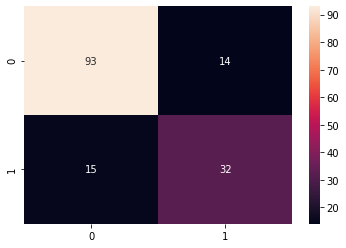

In [32]:
model=RandomForestClassifier(n_estimators=100)
#fitting data to Random Forest model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)

print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

###Tunning Hyperparameters for RandomForestClassifier

The most important parameter is the number of random features to sample at each split point (max_features).

You could try a range of integer values, such as 1 to 20, or 1 to half the number of input features.

    max_features [1 to 20]

Alternately, you could try a suite of different default value calculators.

    max_features in [‘sqrt’, ‘log2’]

Another important parameter for random forest is the number of trees (n_estimators).

Ideally, this should be increased until no further improvement is seen in the model.

Good values might be a log scale from 10 to 1,000.

    n_estimators in [10, 100, 1000]

In [35]:
#model
model=RandomForestClassifier()
#parameter
max_features=["sqrt","log2"]
n_estimators=[5,10,100,1000]
grid={"max_features":max_features,"n_estimators":n_estimators}
kfold=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)


In [36]:
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=kfold,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'max_features': 'sqrt', 'n_estimators': 100}
0.7421470121628767


Accuracy is : 0.7792207792207793
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       107
           1       0.64      0.64      0.64        47

    accuracy                           0.78       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.78      0.78      0.78       154



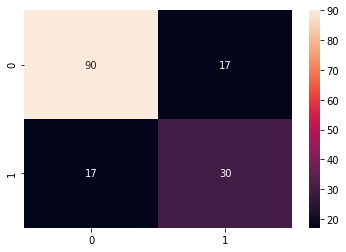

In [37]:
model=RandomForestClassifier(n_estimators=100 ,max_features='sqrt')
#fitting data to Random Forest model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)

print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

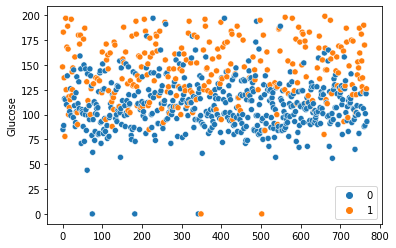

In [38]:
sns.scatterplot(data=df, x=df.index, y=df['Glucose'],hue=model.predict(x))